I'll will deal with simple Expense and Income tables for private usage. 

## Private budgeting with python and pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'data/expense_income.txt'
exp_inc = pd.read_csv(path, sep=";")
exp_inc

,Date,Description,Category,Out,In
0,2020-06-02,Salary Frank,Income,0.00,4896.44
1,2020-06-03,supermarket,food and beverages,132.40,0.00
2,2020-06-04,Salary Laura,Income,0.00,4910.14
3,2929-06-04,"GreenEnergy Corp., (electricity)",utility,87.34,0.00
4,2020-06-09,water and sewage,utility,60.56,0.00
5,2020-06-10,"Fitness studio, Jane",health and sports,19.00,0.00
6,2020-06-11,payment to bank,monthly redemption payment,1287.43,0.00
7,2020-06-12,LeGourmet Restaurant,restaurants and hotels,145.00,0.00
8,2020-06-13,supermarket,food and beverages,197.42,0.00
9,2020-06-13,Pizzeria da Pulcinella,restaurants and hotels,60.00,0.00


The balances of their expenses and incomes can be easily calculated by applying the sum on the DataFrame

In [3]:
exp_inc[['Out', 'In']].sum()

Out     5097.44
In     19613.16
dtype: float64

Expenses summed up according to the different categories.

In [4]:
category_sums = exp_inc.groupby('Category').sum()
category_sums

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13572\202682634.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_sums = exp_inc.groupby('Category').sum()


,Out,In
Category,,
Income,0.00,19613.16
education and culture,144.00,0.00
food and beverages,1174.61,0.00
health and sports,650.18,0.00
insurances and taxes,167.89,0.00
monthly redemption payment,2574.86,0.00
restaurants and hotels,238.00,0.00
utility,147.90,0.00


In [5]:
category_sums.index

Index(['Income', 'education and culture', 'food and beverages',
       'health and sports', 'insurances and taxes',
       'monthly redemption payment', 'restaurants and hotels', 'utility'],
      dtype='object', name='Category')

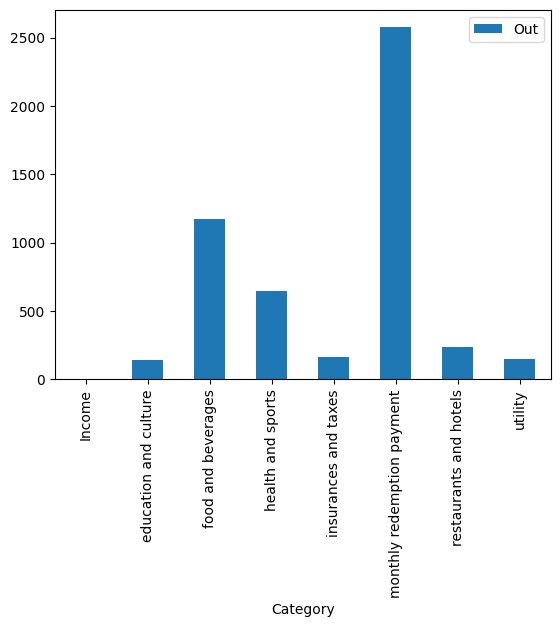

In [11]:
ax = category_sums.plot.bar(y='Out')
plt.xticks(rotation=90)
plt.show()

I can also display this as a pie chart:

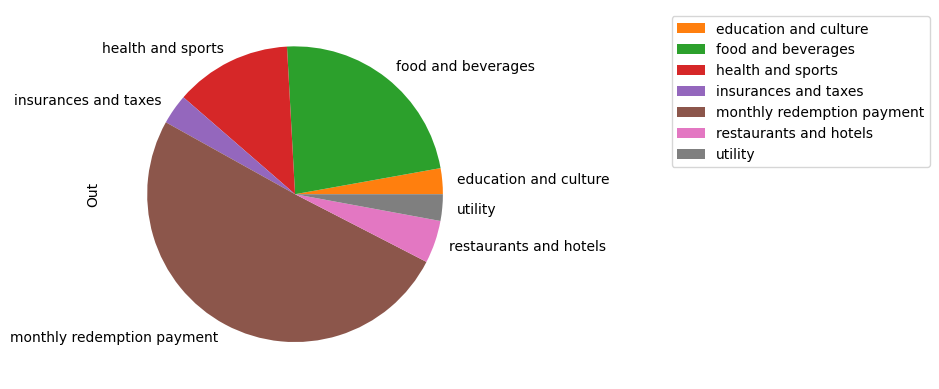

In [19]:
ax1 = category_sums['Out'].plot.pie()
ax1.legend(loc='upper left', bbox_to_anchor=(1.5, 1))

In [20]:
category2account = {'monthly redemption payment': '200',
                    'insurances and taxes': '201',
                    'food and beverages': '202',
                    'education and culture': '203',
                    'transport': '204',
                    'health and sports': '205',
                    'household goods and services': '206',
                    'clothing': '207',
                    'communications': '208',
                    'restaurants and hotels': '209',
                    'utility': '210',
                    'other expenses': '211',
                    'Income': '400'}

In [21]:
exp_inc.replace(category2account, inplace=True)

In [23]:
exp_inc.rename(columns={'Category':'Accounts'}, inplace=True)

In [24]:
exp_inc[:5]

,Date,Description,Accounts,Out,In
0,2020-06-02,Salary Frank,400,0.00,4896.44
1,2020-06-03,supermarket,202,132.40,0.00
2,2020-06-04,Salary Laura,400,0.00,4910.14
3,2929-06-04,"GreenEnergy Corp., (electricity)",210,87.34,0.00
4,2020-06-09,water and sewage,210,60.56,0.00


I will save this DataFrame object now in an excel file. This excel file will have two sheets: One with the "expenses and income" journal and the other one with the mapping of account numbers to category names.

In [34]:
acc_no = pd.Series(list(category2account.keys()), index=category2account.values())
acc_no.name = 'Accounts'
acc_no

200      monthly redemption payment
201            insurances and taxes
202              food and beverages
203           education and culture
204                       transport
205               health and sports
206    household goods and services
207                        clothing
208                  communications
209          restaurants and hotels
210                         utility
211                  other expenses
400                          Income
Name: Accounts, dtype: object

In [40]:
with pd.ExcelWriter('data/expenses_and_income_2020.xlsx') as writer:
    acc_no.to_excel(writer, "account numbers")
    exp_inc.to_excel(writer, "Journal")
    writer.save()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13572\358972651.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
